In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('wine_fraud.csv')

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [6]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [7]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

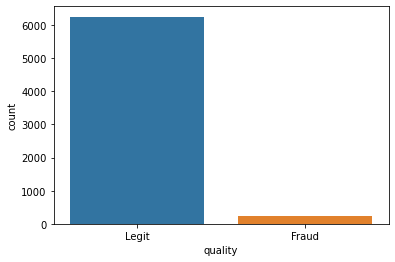

In [8]:
sns.countplot(data=df,x='quality')


<AxesSubplot:xlabel='type', ylabel='count'>

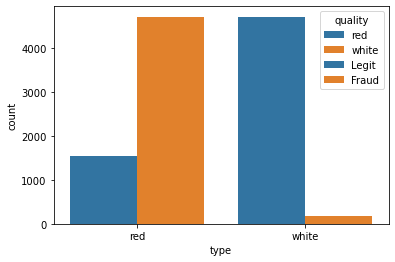

In [9]:
# RED WINE WHITE WINE
sns.countplot(data=df,x='quality',hue='type')
sns.countplot(data=df,hue='quality',x='type')

In [10]:
# PER OF WINE
reds=df[df['type']=='red']
whites=df[df['type']=='white']



In [11]:
100*len(reds[reds['quality']=='Fraud'])/len(reds)

3.9399624765478425

In [12]:
100*len(whites[whites['quality']=='Fraud'])/len(whites)

3.736218864842793

<AxesSubplot:>

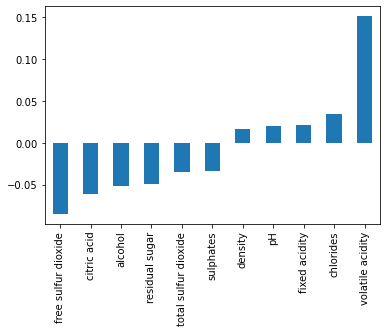

In [13]:
# CALC correlation between features
df['Fraud']=df['quality'].map({'Legit':0, 'Fraud':1})

df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')

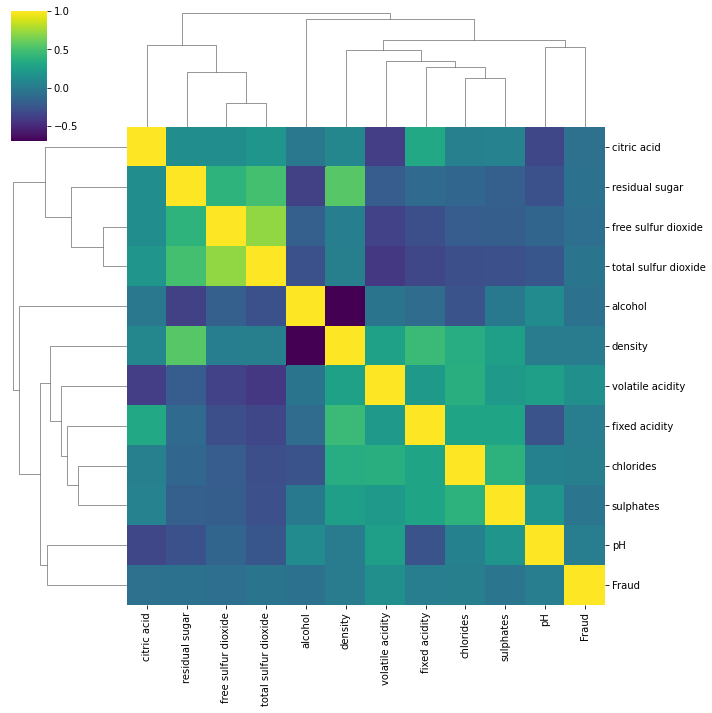

In [14]:
# bar plot of correlation
sns.clustermap(df.corr(),cmap='viridis')

In [15]:
df=df.drop('Fraud',axis=1)

In [16]:
# red white to dummy variable
df['type']=pd.get_dummies(df['type'],drop_first=True)

In [17]:
# X,y 
X=df.drop('quality',axis=1)
y=df['quality']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [18]:
# scale,train
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
# SVC
from sklearn.svm import SVC
model=SVC(class_weight='balanced')
param_grid={
   'C':[0.001,0.01,0.1,0.5,1]
}


In [20]:
# Grid Search C and gaMMA
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model,param_grid,scoring='accuracy',cv=5)

In [21]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]}, scoring='accuracy')

In [25]:
grid.best_params_

{'C': 1}

In [22]:
y_pred=grid.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [30]:
confusion_matrix(y_test,y_pred)

array([[ 19,   6],
       [ 96, 529]], dtype=int64)

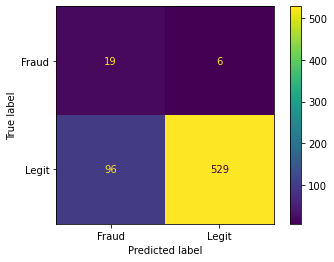

In [34]:
plot_confusion_matrix(grid,X_test,y_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.17      0.76      0.27        25
       Legit       0.99      0.85      0.91       625

    accuracy                           0.84       650
   macro avg       0.58      0.80      0.59       650
weighted avg       0.96      0.84      0.89       650

